# Week 4 Assignment:  Olufemi Obembe

In [2]:
df <- read.csv("scores.csv",header=TRUE)

In [3]:
head(df)

Count,Score,Section
10,200,Sports
10,205,Sports
20,235,Sports
10,240,Sports
10,250,Sports
10,265,Regular


### Question a1.  What are the observations units in this study?   Answer:   Comparison of the performance of students using course grades and total points earned in the course.

### Question a2.  identify the narrative and determine the categorical and quantitative variables?  The categorical variable = section, while the quantitative variable = Score


### Question a3.  Creating 2 sub-variables from scores datasets 

In [4]:
regular_df = subset(df,Section=="Regular")
head(regular_df)

,Count,Score,Section
6,10,265,Regular
7,10,275,Regular
9,10,295,Regular
10,10,300,Regular
13,10,305,Regular
14,10,310,Regular


In [5]:
sports_df = subset(df,Section=="Sports")
head(sports_df)

,Count,Score,Section
1,10,200,Sports
2,10,205,Sports
3,20,235,Sports
4,10,240,Sports
5,10,250,Sports
8,30,285,Sports


 ### Question a4.  Ploting each section scores and number of students achieving scores

In [6]:
library("ggplot2")

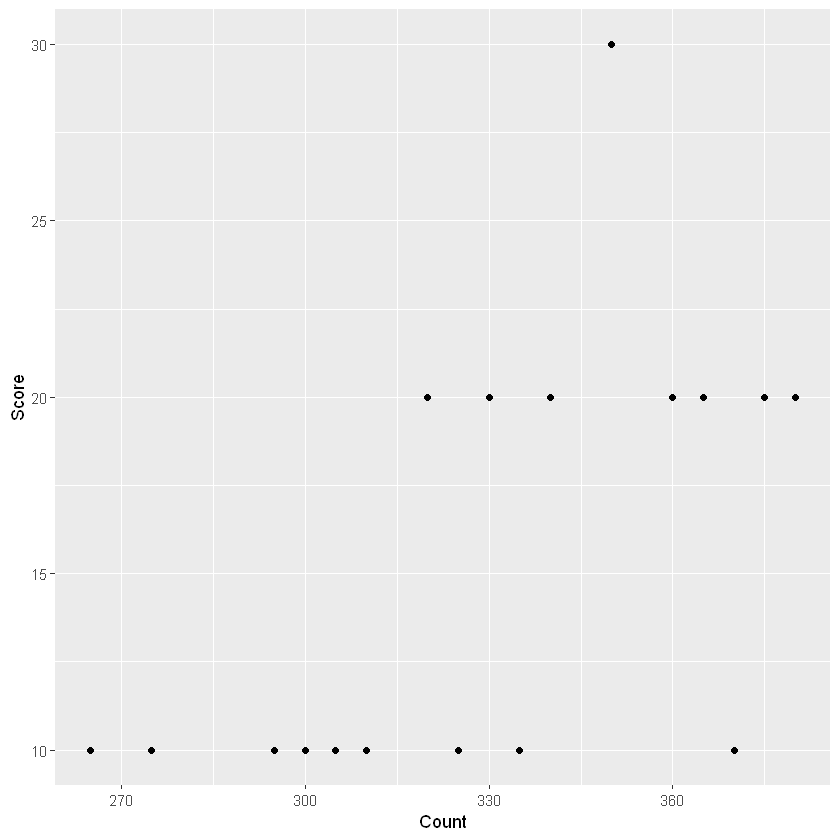

In [7]:
plot_regular = ggplot(regular_df,aes(Score,Count)) + geom_point()+ labs(x="Count",y="Score")
plot_regular

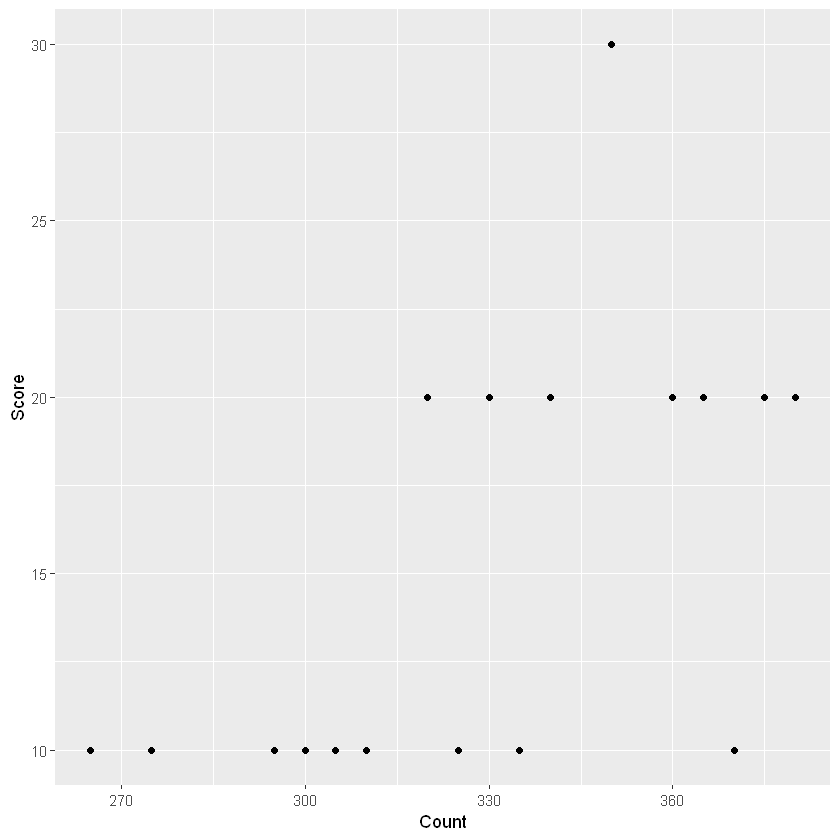

In [8]:
plot_sports = ggplot(sports_df,aes(Score,Count)) + geom_point()+ labs(x="Count",y="Score")
plot_regular

#### Question A4:a.   Answer:  A visual inspection of the two graphs does not suggest any difference between the performance of the 2 sets of students.

#### Qustion A4:b.  Answer.  No.  From the graph it can be seen that not every student in one section scores more points than every student in the other section.  The visuals plots of the 2 sections are almost similar.

#### Question A4:c  It seems to me that the 2 groups being compared are not similar.  One group comprises of sports enthusiats while the other group does not.  In a way, the data is sufficient but the mode of selection should have been allowed to be random.

## Question 2: Data Transformation Exercise

#### a) use apply function on any of the row

In [18]:
#install.packages("MASS")
library(MASS)

In [22]:
data(state)

In [23]:
head(state.x77)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [24]:
# obtaing the column mean and median of the dataset

apply(state.x77,2,mean)

Population     Income Illiteracy   Life Exp     Murder    HS Grad      Frost 
 4246.4200  4435.8000     1.1700    70.8786     7.3780    53.1080   104.4600 
      Area 
70735.8800

In [25]:
apply(state.x77,2,median)

Population     Income Illiteracy   Life Exp     Murder    HS Grad      Frost 
  2838.500   4519.000      0.950     70.675      6.850     53.250    114.500 
      Area 
 54277.000

In [26]:
aggregate(Population ~ Income,state.x77,mean)

Income,Population
3098,2341
3378,2110
3545,3806
3601,1144
3617,1799
3624,3615
3635,2816
3694,1058
3712,3387
3821,4173


#### Splitting and combing data with plyr package

In [30]:
acs_df <- read.csv("acs-14-1Yr-s0201.csv",header=TRUE)

In [31]:
head(acs_df)

Id,Id2,Geography,PopGroupID,POPGROUP.display.label,RacesReported,HSDegree,BachDegree
0500000US01073,1073,"Jefferson County, Alabama",1,Total population,660793,89.1,30.5
0500000US04013,4013,"Maricopa County, Arizona",1,Total population,4087191,86.8,30.2
0500000US04019,4019,"Pima County, Arizona",1,Total population,1004516,88.0,30.8
0500000US06001,6001,"Alameda County, California",1,Total population,1610921,86.9,42.8
0500000US06013,6013,"Contra Costa County, California",1,Total population,1111339,88.8,39.7
0500000US06019,6019,"Fresno County, California",1,Total population,965974,73.6,19.7


In [33]:
install.packages("plyr")

Installing package into 'C:/Users/fobem/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fobem\AppData\Local\Temp\RtmpkhUxvl\downloaded_packages


In [34]:
library("plyr")

Warning message:
"package 'plyr' was built under R version 3.6.3"

In [36]:
# split the dataframe by PopGroupID

pop1<- ddply(acs_df,.(PopGroupID))
head(pop1)

Id,Id2,Geography,PopGroupID,POPGROUP.display.label,RacesReported,HSDegree,BachDegree
0500000US01073,1073,"Jefferson County, Alabama",1,Total population,660793,89.1,30.5
0500000US04013,4013,"Maricopa County, Arizona",1,Total population,4087191,86.8,30.2
0500000US04019,4019,"Pima County, Arizona",1,Total population,1004516,88.0,30.8
0500000US06001,6001,"Alameda County, California",1,Total population,1610921,86.9,42.8
0500000US06013,6013,"Contra Costa County, California",1,Total population,1111339,88.8,39.7
0500000US06019,6019,"Fresno County, California",1,Total population,965974,73.6,19.7


In [37]:
pop1

Id,Id2,Geography,PopGroupID,POPGROUP.display.label,RacesReported,HSDegree,BachDegree
0500000US01073,1073,"Jefferson County, Alabama",1,Total population,660793,89.1,30.5
0500000US04013,4013,"Maricopa County, Arizona",1,Total population,4087191,86.8,30.2
0500000US04019,4019,"Pima County, Arizona",1,Total population,1004516,88.0,30.8
0500000US06001,6001,"Alameda County, California",1,Total population,1610921,86.9,42.8
0500000US06013,6013,"Contra Costa County, California",1,Total population,1111339,88.8,39.7
0500000US06019,6019,"Fresno County, California",1,Total population,965974,73.6,19.7
0500000US06029,6029,"Kern County, California",1,Total population,874589,74.5,15.4
0500000US06037,6037,"Los Angeles County, California",1,Total population,10116705,77.5,30.3
0500000US06059,6059,"Orange County, California",1,Total population,3145515,84.6,38.0
0500000US06065,6065,"Riverside County, California",1,Total population,2329271,80.6,20.7


In [43]:
install.packages("psych")

Installing package into 'C:/Users/fobem/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'tmvnsim', 'mnormt'




  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.1.9             FALSE

package 'tmvnsim' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fobem\AppData\Local\Temp\RtmpkhUxvl\downloaded_packages


installing the source package 'psych'



In [44]:
library("psych")


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



In [47]:
library("psych")

In [48]:
# Checking distribution of the data

round(stat.desc(acs_df[, c("RacesReported","HSDegree","BachDegree")],basic=FALSE,norm=TRUE),digits=2)

ERROR: Error in stat.desc(acs_df[, c("RacesReported", "HSDegree", "BachDegree")], : could not find function "stat.desc"


In [51]:
describe(acs_df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Id*,1,136,6.850000e+01,3.940389e+01,68.5,68.50000,50.40840,1.0,136.0,135.0,0.00000000,-1.2265011,3.378856e+00
Id2,2,136,2.683313e+04,1.542911e+04,26112.0,26542.96364,20778.63900,1073.0,55079.0,54006.0,0.04793197,-1.3352068,1.323036e+03
Geography*,3,136,6.850000e+01,3.940389e+01,68.5,68.50000,50.40840,1.0,136.0,135.0,0.00000000,-1.2265011,3.378856e+00
PopGroupID,4,136,1.000000e+00,0.000000e+00,1.0,1.00000,0.00000,1.0,1.0,0.0,NaN,NaN,0.000000e+00
POPGROUP.display.label*,5,136,1.000000e+00,0.000000e+00,1.0,1.00000,0.00000,1.0,1.0,0.0,NaN,NaN,0.000000e+00
RacesReported,6,136,1.144401e+06,1.090508e+06,832707.5,927231.73636,314163.68130,500292.0,10116705.0,9616413.0,4.97619786,33.4999482,9.351028e+04
HSDegree,7,136,8.763235e+01,5.117941e+00,88.7,88.28091,3.78063,62.2,95.5,33.3,-1.67476661,4.3528565,4.388598e-01
BachDegree,8,136,3.546103e+01,9.509731e+00,34.1,35.22727,8.22843,15.4,60.3,44.9,0.32843046,-0.2774249,8.154527e-01


In [53]:
shapiro.test(acs_df$HSDegree)


	Shapiro-Wilk normality test

data:  acs_df$HSDegree
W = 0.87736, p-value = 3.194e-09


### Using the shapiro, we test for normality of the HSDegree variable and we found that p was significantly less than 0.001 which indicates that the distribution is not normal.  

In [54]:
# Creating new variables:  

acs_df$bachsq <- acs_df$BachDegree * acs_df$BachDegree

In [56]:
head(acs_df)

Id,Id2,Geography,PopGroupID,POPGROUP.display.label,RacesReported,HSDegree,BachDegree,bachsq
0500000US01073,1073,"Jefferson County, Alabama",1,Total population,660793,89.1,30.5,930.25
0500000US04013,4013,"Maricopa County, Arizona",1,Total population,4087191,86.8,30.2,912.04
0500000US04019,4019,"Pima County, Arizona",1,Total population,1004516,88.0,30.8,948.64
0500000US06001,6001,"Alameda County, California",1,Total population,1610921,86.9,42.8,1831.84
0500000US06013,6013,"Contra Costa County, California",1,Total population,1111339,88.8,39.7,1576.09
0500000US06019,6019,"Fresno County, California",1,Total population,965974,73.6,19.7,388.09


In [57]:
# creating square of HSDegree

acs_df$Hsqr <- acs_df$HSDegree * acs_df$HSDegree

In [58]:
head(acs_df)

Id,Id2,Geography,PopGroupID,POPGROUP.display.label,RacesReported,HSDegree,BachDegree,bachsq,Hsqr
0500000US01073,1073,"Jefferson County, Alabama",1,Total population,660793,89.1,30.5,930.25,7938.81
0500000US04013,4013,"Maricopa County, Arizona",1,Total population,4087191,86.8,30.2,912.04,7534.24
0500000US04019,4019,"Pima County, Arizona",1,Total population,1004516,88.0,30.8,948.64,7744.00
0500000US06001,6001,"Alameda County, California",1,Total population,1610921,86.9,42.8,1831.84,7551.61
0500000US06013,6013,"Contra Costa County, California",1,Total population,1111339,88.8,39.7,1576.09,7885.44
0500000US06019,6019,"Fresno County, California",1,Total population,965974,73.6,19.7,388.09,5416.96
